### 5  Comparison to Rounce et al. 2023 and Zekollari et al.  in review

In [25]:
import pandas as pd
import numpy as np
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
fs = 24

def plotlabel(xvar, yvar, label, ax=None):
    ax.text(xvar-1, yvar+0.8, label, alpha=0.7, fontsize=fs)
def plotlabel_l(xvar, yvar, label, ax=None):
    ax.text(xvar-3, yvar+0.8, label, alpha=0.7, fontsize=fs)

In [26]:
df = pd.read_csv(f'../data/3_shift_summary_region_characteristicsFeb12_2024.csv', index_col=[0])
vol_2020_hugo_fari = np.concatenate([df['regional_volume_m3_2020_via_5yravg'][1:].values, np.array([df['regional_volume_m3_2020_via_5yravg'][0]])])

/tmp/ipykernel_2697032/3297394800.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vol_2020_hugo_fari = np.concatenate([df['regional_volume_m3_2020_via_5yravg'][1:].values, np.array([df['regional_volume_m3_2020_via_5yravg'][0]])])


In [27]:

pd_l = pd.read_csv(f'../data/lowess_fit_rel_2020_101yr_avg_steady_state_Feb12_2024.csv', index_col=[0])
pd_l.index = pd_l.temp_ch
pd_l.index = pd_l.index.values.round(2)



In [28]:
divide_hugo_fari = False

In [102]:
ds_zekollari = xr.open_dataset('../data/data_from_others/zekollari_et_al_2024_glambie_selection.nc')
pd_zekollari_h_f = (100 * ds_zekollari.volume_m3.sel(year=2100)/vol_2020_hugo_fari.reshape(1,1,20,1)).to_dataframe().reset_index()
pd_zekollari_z = (100*ds_zekollari.volume_m3.sel(year=2100)/ds_zekollari.volume_m3.sel(year=2020)).to_dataframe().reset_index()

if divide_hugo_fari:
    pd_zekollari = pd_zekollari_h_f
else:
    pd_zekollari = pd_zekollari_z
pd_zekollari['gcm_scenario'] = pd_zekollari['gcm'] + '_' + pd_zekollari['scenario']
pd_zekollari = pd_zekollari.set_index('gcm_scenario')
pd_zekollari =  pd_zekollari.rename(columns = {'volume_m3':'volume_2100_rel_2020_%'})
pd_temp_ch_cmip6 = pd.read_csv('/home/www/oggm/oggm-standard-projections/analysis_notebooks/Global_mean_temp_deviation_2071_2100_2081_2100_2271_2300_2281_2300_rel_1850_1900_cmip6_gcms_ipcc_ar6_def.csv',
                               index_col=[0])


### Estimating the temperature sensitivity of Rounce et al., 2023 (estimates for the main text):

In [213]:
# get the rounce et al. 2023 data
#ds_rounce_2023_rcps = xr.open_dataset('../data/data_from_others/rounce_et_al_2023_Global_reg_allvns_50sets_2000_2100-rcps.nc').sum(dim='region', skipna=True).reg_mass_annual
#ds_rounce_2023_rcps_2100_rel_2020 = 100*ds_rounce_2023_rcps.sel(year=2100)/ds_rounce_2023_rcps.sel(year=2020)
#pd_rounce_2023_rcps_2100_rel_2020 = ds_rounce_2023_rcps_2100_rel_2020.to_dataframe().reset_index().dropna()
ds_rounce_2023_ssps = xr.open_dataset('../data/data_from_others/rounce_et_al_2023_Global_reg_allvns_50sets_2000_2100-ssps.nc')
ds_rounce_2023_ssps_mass = ds_rounce_2023_ssps.sum(dim='region', skipna=True).reg_mass_annual
path_temp = '../data/data_from_others/rounce_et_al_2023_Global_mean_temp_deviation_2081_2100_rel_1850_1900.csv'
pd_temp_ssp_gcm = pd.read_csv(path_temp)
pd_temp_ssp_gcm.index = pd_temp_ssp_gcm['GCM'] + '_' + pd_temp_ssp_gcm['Scenario']

### Now, above-sea level and SLE estimates
ds_rounce_2023_ssps_mass_asl = ds_rounce_2023_ssps.reg_mass_annual.sum(dim='region') - ds_rounce_2023_ssps.reg_mass_bsl_annual.sum(dim='region')
ds_rounce_2023_ssps_m3_asl_diff_2015_2100 = (ds_rounce_2023_ssps_mass_asl.sel(year=2015) - ds_rounce_2023_ssps_mass_asl.sel(year=2100))/900 
# this is a rough estimate (similar as in Farinotti et al. 2019, maybe Rounce et al. used a slight variation of it, but this is not too important here)
rho = 900
rho_oc = 1028
A_oc = 362.5 * 1e9
pd_rounce_2023_ssps_m3_asl_diff_2015_2100 = ds_rounce_2023_ssps_m3_asl_diff_2015_2100.to_dataframe('m3_asl_diff_2015_2100').reset_index().dropna()
pd_rounce_2023_ssps_m3_asl_diff_2015_2100['mm_from_2015_to_2100'] = pd_rounce_2023_ssps_m3_asl_diff_2015_2100['m3_asl_diff_2015_2100']* rho/(A_oc * rho_oc)
pd_rounce_2023_ssps_m3_asl_diff_2015_2100['Scenario'] = pd_rounce_2023_ssps_m3_asl_diff_2015_2100['Scenario'].replace({'SSP1-1.9':'ssp119', 'SSP1-2.6':'ssp126', 'SSP2-4.5':'ssp245', 'SSP3-7.0':'ssp370', 'SSP5-8.5':'ssp585' })
pd_rounce_2023_ssps_m3_asl_diff_2015_2100.index = pd_rounce_2023_ssps_m3_asl_diff_2015_2100['Climate_Model'] + '_' + pd_rounce_2023_ssps_m3_asl_diff_2015_2100['Scenario']

In [225]:


### relative to 2020
pd_rounce_2023_2100_rel_2020 = 100*ds_rounce_2023_ssps_mass.sel(year=2100)/ds_rounce_2023_ssps_mass.sel(year=2020)
pd_rounce_2023_2100_rel_2020 = pd_rounce_2023_2100_rel_2020.to_dataframe().reset_index().dropna()
pd_rounce_2023_2100_rel_2020 =  pd_rounce_2023_2100_rel_2020.rename(columns = {'reg_mass_annual':'mass_2100_rel_2020_%'})
pd_rounce_2023_2100_rel_2020['Scenario'] = pd_rounce_2023_2100_rel_2020['Scenario'].replace({'SSP1-1.9':'ssp119', 'SSP1-2.6':'ssp126', 'SSP2-4.5':'ssp245', 'SSP3-7.0':'ssp370', 'SSP5-8.5':'ssp585' })
pd_rounce_2023_2100_rel_2020.index = pd_rounce_2023_2100_rel_2020['Climate_Model'] + '_' + pd_rounce_2023_2100_rel_2020['Scenario']

### relativ eto 2015
pd_rounce_2023_2100_rel_2015 = 100*ds_rounce_2023_ssps_mass.sel(year=2100)/ds_rounce_2023_ssps_mass.sel(year=2015)
pd_rounce_2023_2100_rel_2015 = pd_rounce_2023_2100_rel_2015.to_dataframe().reset_index().dropna()
pd_rounce_2023_2100_rel_2015 =  pd_rounce_2023_2100_rel_2015.rename(columns = {'reg_mass_annual':'mass_2100_rel_2020_%'})
pd_rounce_2023_2100_rel_2015['Scenario'] = pd_rounce_2023_2100_rel_2015['Scenario'].replace({'SSP1-1.9':'ssp119', 'SSP1-2.6':'ssp126', 'SSP2-4.5':'ssp245', 'SSP3-7.0':'ssp370', 'SSP5-8.5':'ssp585' })
pd_rounce_2023_2100_rel_2015.index = pd_rounce_2023_2100_rel_2015['Climate_Model'] + '_' + pd_rounce_2023_2100_rel_2015['Scenario']


## the exact same approach as David Rounce
med_remaining_vol_d = {}
med_remaining_vol_d_rel_2015 = {}   # in rounce et al. 2023 fig. 1, numbers are rel. to 2015
med_mm_sle_from_2015_to_2100 = {}
for _temp in [1.5,3.0]:
    if _temp==1.5:
        _r = 0.25
    else:
        _r = 0.5
    temp = _temp 
    exp_around_temp = pd_temp_ssp_gcm.loc[(pd_temp_ssp_gcm['global_mean_deviation_degC'] >= temp-_r) & (pd_temp_ssp_gcm['global_mean_deviation_degC'] <=temp+_r)]
    common_exps = []
    for e in exp_around_temp.index.values:
        if e in pd_rounce_2023_2100_rel_2020.index:
            common_exps.append(e)
    print(_r, temp, len(exp_around_temp), len(common_exps))
    print('median over gcms', pd_temp_ssp_gcm.loc[common_exps]['global_mean_deviation_degC'].median())
    med_remaining_vol_d[_temp] = pd_rounce_2023_2100_rel_2020.loc[common_exps]['mass_2100_rel_2020_%'].median()
    med_remaining_vol_d_rel_2015[_temp]  = pd_rounce_2023_2100_rel_2015.loc[common_exps]['mass_2100_rel_2020_%'].median()
    med_mm_sle_from_2015_to_2100[_temp] = pd_rounce_2023_ssps_m3_asl_diff_2015_2100.loc[common_exps]['mm_from_2015_to_2100'].median()

0.25 1.5 10 10
median over gcms 1.6114660952139448
0.5 3.0 12 12
median over gcms 3.232408048583838


In [223]:
# additional mass loss for 3°C compared to 1.5°C scenario
med_remaining_vol_d[1.5] - med_remaining_vol_d[3.0]

8.285213337513738

In [227]:
# additional mass loss for 3°C compared to 1.5°C scenario --> rel. to 2015 is almost the same... 
med_remaining_vol_d_rel_2015[1.5] - med_remaining_vol_d_rel_2015[3.0]

8.270985084548144

In [228]:
# mass loss per 0.1°C 
(med_remaining_vol_d[1.5] - med_remaining_vol_d[3.0])/15

0.5523475558342492

In [229]:
# additional mm sea level rise for 3°C until year 2100 compared to 1.5°C scenario
med_mm_sle_from_2015_to_2100[3.0] - med_mm_sle_from_2015_to_2100[1.5]

33.99656925668242

In [230]:
(med_mm_sle_from_2015_to_2100[3.0] - med_mm_sle_from_2015_to_2100[1.5])/15

2.2664379504454946

These estimates were used in the manuscript for the following text paragraph: 
For context, recent glacier projections aggregated by transient temperature change scenarios (rounce et al., 2023) estimate that by 2100, a +3.0°C scenario would result in about **8%** more global glacier mass loss (34 mm additional sea-level rise) than the +1.5°C scenario, corresponding to ~**0.6%** more mass loss and 2.3 mm of sea-level rise per 0.1°C increase. 

## Comparison to Zekollari et al. 2024

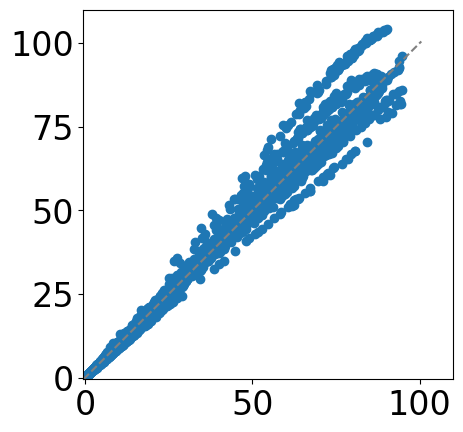

In [21]:
plt.plot(pd_zekollari_z['volume_m3'], pd_zekollari_h_f['volume_m3'] , 'o')
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.set_ylim([-0.5,110])
ax.set_xlim([-0.5,110])

ax.plot([-0.5,100.5],[-0.5,100.5],'--',color='grey')

17
2               0.5  mass_loss_rel_2020_%  zekollari_mass_loss_rel_2020_%  reg
region                                                                      
01      41.606172             58.393828                       45.373441   01
02       6.516786             93.483214                       82.220862   02
03      53.147089             46.852911                       14.320640   03
04       5.093941             94.906059                       41.129146   04
05      32.304293             67.695707                       32.221758   05
06      23.380292             76.619708                       33.928006   06
07      17.751381             82.248619                       28.856566   07
08       0.403049             99.596951                       68.658279   08
09      11.929050             88.070950                       21.504169   09
10      13.921925             86.078075                       78.225144   10
11      13.770280             86.229720                       82.675915

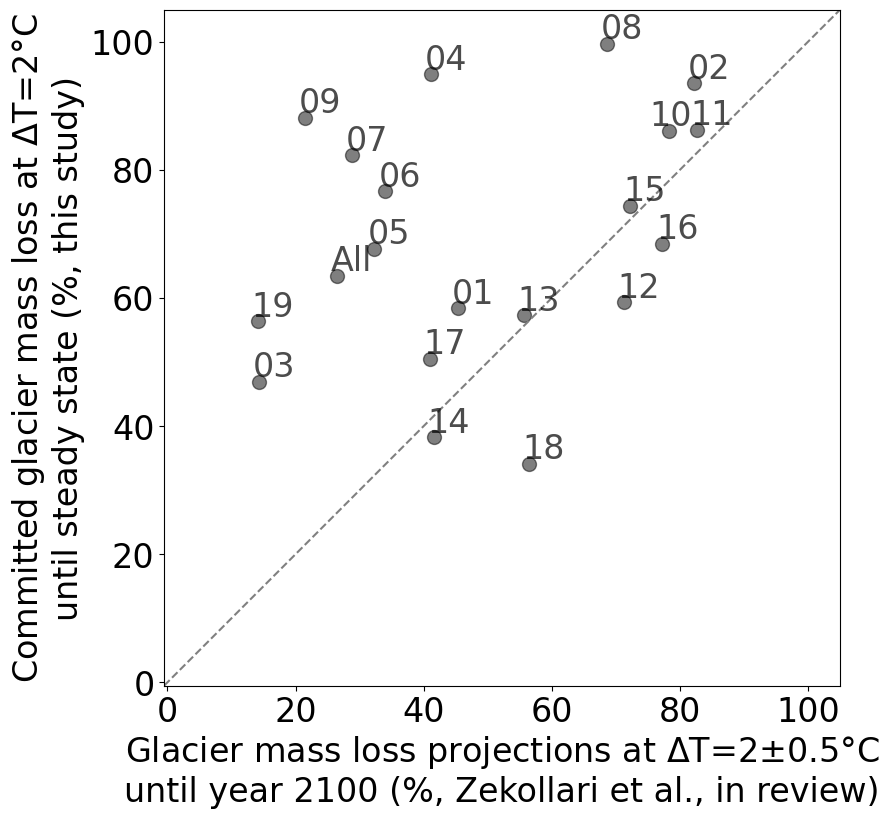

In [22]:
# glacier mass loss in GMIP3
plt.rc('font', size=24)  


fig, axs = plt.subplots(1,1, figsize=(9,9))
axs = [axs]
for j,temp in enumerate([2]): #,3]): 
    pd_gmip3_lowess_aroundtemp = pd_l.loc[temp][['0.5', 'region']]
    pd_gmip3_lowess_aroundtemp = pd_gmip3_lowess_aroundtemp.set_index('region')
    pd_gmip3_lowess_aroundtemp['mass_loss_rel_2020_%'] = 100 - pd_gmip3_lowess_aroundtemp['0.5']

    exp_around_temp = pd_temp_ch_cmip6.loc[(pd_temp_ch_cmip6['global_temp_ch_2071-2100_preindustrial'] > temp-0.5) & (pd_temp_ch_cmip6['global_temp_ch_2071-2100_preindustrial'] <temp+0.5)]
    common_exps = []
    for e in exp_around_temp.index.values:
        if e in pd_zekollari.index:
            common_exps.append(e)
    print(len(common_exps))
    
    pd_zekollari_around_temp = pd_zekollari.loc[common_exps].copy()

    pd_zekollari_around_temp['mass_loss_rel_2020_%'] = 100 - pd_zekollari_around_temp['volume_2100_rel_2020_%']
    pd_zekollari_around_temp_med = pd_zekollari_around_temp.drop(columns=['gcm','model','scenario']).groupby(['region']).median().reset_index()    # model
    pd_zekollari_around_temp_med = pd_zekollari_around_temp_med.set_index('region')
    

    ### now the plot
    reg_l = []
    for r in pd_gmip3_lowess_aroundtemp.index:
        if r == 'All':
            reg = 'global'
        else:
            reg = f'RGI{r}'
        reg_l.append(reg)

    pd_gmip3_lowess_aroundtemp['zekollari_mass_loss_rel_2020_%'] = pd_zekollari_around_temp_med.loc[reg_l]['mass_loss_rel_2020_%'].values
    pd_gmip3_lowess_aroundtemp['reg'] = pd_gmip3_lowess_aroundtemp.index

    ax = axs[j]

    ax.plot(pd_gmip3_lowess_aroundtemp['zekollari_mass_loss_rel_2020_%'], 
             pd_gmip3_lowess_aroundtemp['mass_loss_rel_2020_%'],
             'o', ms=10, color='black', alpha = 0.5)

    xx = 'zekollari_mass_loss_rel_2020_%'
    yy = 'mass_loss_rel_2020_%'
    
    pd_gmip3_lowess_aroundtemp.drop(['10']).apply(lambda x: plotlabel(x[xx],x[yy], x.reg, ax=ax), axis=1)
    pd_gmip3_lowess_aroundtemp.loc[['10']].apply(lambda x: plotlabel_l(x[xx],x[yy], x.reg, ax=ax), axis=1)

    # .drop(['19','17','18','15','13'])


    ax.set_aspect('equal', adjustable='box')
    ax.plot([-0.5,105.5],[-0.5,105.5],'--',color='grey')

    ax.set_ylim([-0.5,105])
    ax.set_xlim([-0.5,105])

    ax.set_xlabel(r'Glacier mass loss projections at $\Delta$T=2$\pm$0.5°C' + f'\nuntil year 2100 (%, Zekollari et al., in review)')
                  # Zekollari et al. in review (median over\n{len(common_exps)} experiments at {temp}+/-0.5°C with each 3 glacier models)')
   # ax.set_ylabel(f'This study (GMIP3 median, LOWESS fit at {temp}°C)')
    ax.set_ylabel(r'Committed glacier mass loss at $\Delta$T=2°C'+f'\nuntil steady state (%, this study)')


    
    #ax.set_title(f'Glacier mass loss (rel. to 2020, %) at ΔT = {temp}°C')
    print(temp, pd_gmip3_lowess_aroundtemp)
#if divide_hugo_fari:
#    plt.suptitle('common 2020 estimate used to get to relative estimates (here from Hugonnet/Farinotti)')
plt.tight_layout()
plt.savefig('figures/extended_data/fig_ED4.png')

- in GMIP3: relative to 2020 means dividing through the glacier volume at year 2020 (estimated by Hugonnet and Farinotti)
- in Zekollari et al. dataset : relative to 2020 estimated by dividing by each individual projection in year 2020 
--> (this is likely quite different in some regions at least?)

#### Some unsorted additional analysis - to remove before submission

In [ ]:
_r

In [54]:
pd_rounce_2023_rel_vol_global = pd_zekollari.loc[(pd_zekollari.model=='PyGEM-OGGM')&(pd_zekollari.region=='global')]
## the most similar approach as GMIP3 (i.e. IPCC AR6 temp. definition and 2071-2100
med_remaining_vol_d = {}
for temp in [1.5,3.0]:
    exp_around_temp = pd_temp_ch_cmip6.loc[(pd_temp_ch_cmip6['global_temp_ch_2071-2100_preindustrial'] > temp-0.5) & (pd_temp_ch_cmip6['global_temp_ch_2071-2100_preindustrial'] <temp+0.5)]
    common_exps = []
    for e in exp_around_temp.index.values:
        if e in pd_zekollari.index:
            common_exps.append(e)
    print(temp, len(common_exps))
    med_remaining_vol_d[temp] = pd_rounce_2023_rel_vol_global.loc[common_exps]['volume_2100_rel_2020_%'].median()
med_remaining_vol_d[1.5] - med_remaining_vol_d[3.0]

1.5 8
3.0 12


9.291999537669142

In [170]:
## the most similar approach as GMIP3
med_remaining_vol_d = {}
for _temp in [1.5,3.0]:
    if _temp==1.5:
        _r = 0.25
    else:
        _r = 0.5
    temp = _temp +0.06 # David used the assumption of a warming of 0.63°C between 1850-1900 and 1986-2005 (while we computed it assuming 0.69
    exp_around_temp = pd_temp_ch_cmip6.loc[(pd_temp_ch_cmip6['global_temp_ch_2081-2100_preindustrial'] > temp-_r) & (pd_temp_ch_cmip6['global_temp_ch_2081-2100_preindustrial'] <temp+_r)]
    common_exps = []
    for e in exp_around_temp.index.values:
        if e in pd_zekollari.index:
            common_exps.append(e)
    print(temp, len(common_exps))
    med_remaining_vol_d[_temp] = pd_rounce_2023_rel_vol_global.loc[common_exps]['volume_2100_rel_2020_%'].median()
med_remaining_vol_d[1.5] - med_remaining_vol_d[3.0]

1.56 7
3.06 12


9.70782588409503